<a href="https://colab.research.google.com/github/Soot3/Spotify-Analysis/blob/main/SA_Spotify_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# South African Music Preferences

- Most streamed genres
- Most streamed albums
- Most streamed artists
- Per month (Number one)
- Audio features - mean of top and similarities
- Correlation with position

## Data Preparation

In [59]:
# importing analysis and visualization packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.templates.default = "presentation"
style.use('fivethirtyeight')
sns.set_context("poster")
sns.color_palette("Paired")
%matplotlib inline

In [60]:

df = pd.read_csv('/content/SA_Spotify_data2.csv')

In [61]:
df.head()

,Artist,Position,Streams,Track Name,Week,album,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,21 Savage,12,57808,Mr. Right Now (feat. Drake),2020-10-02--2020-10-09,SAVAGE MODE II,atl hip hop,02/10/2020,193838,87,0.647,0.23100,0.667,0.000000,0.133,-5.563,0.3040,172.080,4
1,21 Savage,13,55186,Runnin,2020-10-02--2020-10-09,SAVAGE MODE II,atl hip hop,02/10/2020,195906,87,0.819,0.00748,0.626,0.101000,0.167,-4.574,0.2020,143.010,4
2,21 Savage,38,39185,Glock In My Lap,2020-10-02--2020-10-09,SAVAGE MODE II,atl hip hop,02/10/2020,193591,83,0.847,0.00574,0.733,0.000010,0.151,-6.439,0.1600,130.029,4
3,21 Savage,42,35608,Rich Nigga Shit (feat. Young Thug),2020-10-02--2020-10-09,SAVAGE MODE II,atl hip hop,02/10/2020,190331,81,0.825,0.34900,0.733,0.000000,0.112,-5.625,0.0969,97.974,4
4,21 Savage,53,30481,Slidin,2020-10-02--2020-10-09,SAVAGE MODE II,atl hip hop,02/10/2020,185036,80,0.774,0.00163,0.706,0.000001,0.104,-6.494,0.3550,152.891,4


In [62]:
df['Week_BD'] = df['Week'].apply((lambda x: x[-10:]))

In [63]:
df['Week_BD'] = pd.to_datetime(df['Week_BD'])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Artist            10800 non-null  object        
 1   Position          10800 non-null  int64         
 2   Streams           10800 non-null  int64         
 3   Track Name        10800 non-null  object        
 4   Week              10800 non-null  object        
 5   album             10800 non-null  object        
 6   artist_top_genre  10800 non-null  object        
 7   release_date      10800 non-null  object        
 8   length            10800 non-null  int64         
 9   popularity        10800 non-null  int64         
 10  danceability      10800 non-null  float64       
 11  acousticness      10800 non-null  float64       
 12  energy            10800 non-null  float64       
 13  instrumentalness  10800 non-null  float64       
 14  liveness          1080

In [65]:
# Number of unique songs and artists
print(df['Artist'].nunique())
df['Track Name'].nunique()

378


1105

In [66]:
df.corr()

,Position,Streams,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
Position,1.000000,-0.777209,0.037694,-0.126913,-0.072249,0.034126,0.002209,-0.005239,-0.070906,-0.018023,-0.027788,-0.024748,0.003903
Streams,-0.777209,1.000000,-0.028598,0.174918,0.087772,-0.016768,-0.008510,-0.016165,0.074003,0.005441,0.050774,0.041903,0.003429
length,0.037694,-0.028598,1.000000,-0.394231,0.109918,-0.153507,-0.063442,0.416166,-0.208657,-0.427054,-0.139346,-0.035803,0.002292
popularity,-0.126913,0.174918,-0.394231,1.000000,-0.112080,0.090564,-0.022346,-0.214647,0.123430,0.278905,0.074802,-0.011254,0.046045
danceability,-0.072249,0.087772,0.109918,-0.112080,1.000000,-0.323820,0.069276,0.099464,-0.084575,-0.020764,0.114126,0.036434,0.040436
acousticness,0.034126,-0.016768,-0.153507,0.090564,-0.323820,1.000000,-0.557217,-0.040734,-0.050510,-0.250585,-0.080685,-0.163552,-0.025459
energy,0.002209,-0.008510,-0.063442,-0.022346,0.069276,-0.557217,1.000000,-0.110163,0.141640,0.615941,0.066462,0.128135,0.083127
instrumentalness,-0.005239,-0.016165,0.416166,-0.214647,0.099464,-0.040734,-0.110163,1.000000,-0.129800,-0.420023,-0.059148,0.044245,-0.009103
liveness,-0.070906,0.074003,-0.208657,0.123430,-0.084575,-0.050510,0.141640,-0.129800,1.000000,0.135967,0.045997,0.016008,-0.072033
loudness,-0.018023,0.005441,-0.427054,0.278905,-0.020764,-0.250585,0.615941,-0.420023,0.135967,1.000000,-0.005113,0.102570,0.046282


Position and streams, obviously

Length and pop, instrumentalness, loudness

acousticness and energy

energy and loudness

instrumentalness and loudness

In [67]:
top_guy = df[df['Position']==2]
top_guy

,Artist,Position,Streams,Track Name,Week,album,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Week_BD
39,24kGoldn,2,86739,Mood (feat. iann dior),2020-10-09--2020-10-16,Mood (feat. iann dior),cali rap,24/07/2020,140525,100,0.700,0.22100,0.722,0.000000,0.2720,-3.558,0.0369,90.989,4,2020-10-16
49,24kGoldn,2,97925,Mood (feat. iann dior),2020-09-11--2020-09-18,Mood (feat. iann dior),cali rap,24/07/2020,140525,100,0.700,0.22100,0.722,0.000000,0.2720,-3.558,0.0369,90.989,4,2020-09-18
1109,Billie Eilish,2,74023,everything i wanted,2019-11-15--2019-11-22,everything i wanted,electropop,13/11/2019,245425,87,0.704,0.90200,0.225,0.657000,0.1060,-14.454,0.0994,120.006,4,2019-11-22
1498,Cardi B,2,84354,WAP (feat. Megan Thee Stallion),2020-10-02--2020-10-09,WAP (feat. Megan Thee Stallion),pop,07/08/2020,187541,98,0.935,0.01940,0.454,0.000000,0.0824,-7.509,0.3750,133.073,4,2020-10-09
1500,Cardi B,2,86120,WAP (feat. Megan Thee Stallion),2020-09-25--2020-10-02,WAP (feat. Megan Thee Stallion),pop,07/08/2020,187541,98,0.935,0.01940,0.454,0.000000,0.0824,-7.509,0.3750,133.073,4,2020-10-02
1502,Cardi B,2,107879,WAP (feat. Megan Thee Stallion),2020-08-14--2020-08-21,WAP (feat. Megan Thee Stallion),pop,07/08/2020,187541,98,0.935,0.01940,0.454,0.000000,0.0824,-7.509,0.3750,133.073,4,2020-08-21
1504,Cardi B,2,102604,WAP (feat. Megan Thee Stallion),2020-09-18--2020-09-25,WAP (feat. Megan Thee Stallion),pop,07/08/2020,187541,98,0.935,0.01940,0.454,0.000000,0.0824,-7.509,0.3750,133.073,4,2020-09-25
1702,DaBaby,2,83152,ROCKSTAR (feat. Roddy Ricch),2020-08-07--2020-08-14,BLAME IT ON BABY,north carolina hip hop,17/04/2020,181733,95,0.746,0.24700,0.690,0.000000,0.1010,-7.956,0.1640,89.977,4,2020-08-14
1756,DaBaby,2,87231,ROCKSTAR (feat. Roddy Ricch),2020-07-17--2020-07-24,BLAME IT ON BABY,north carolina hip hop,17/04/2020,181733,95,0.746,0.24700,0.690,0.000000,0.1010,-7.956,0.1640,89.977,4,2020-07-24
2314,Drake,2,73094,Toosie Slide,2020-05-22--2020-05-29,Dark Lane Demo Tapes,canadian hip hop,01/05/2020,247058,81,0.830,0.28900,0.490,0.000003,0.1130,-8.820,0.2090,81.604,4,2020-05-29


Positions are kept for concurrent weeks

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Artist            10800 non-null  object        
 1   Position          10800 non-null  int64         
 2   Streams           10800 non-null  int64         
 3   Track Name        10800 non-null  object        
 4   Week              10800 non-null  object        
 5   album             10800 non-null  object        
 6   artist_top_genre  10800 non-null  object        
 7   release_date      10800 non-null  object        
 8   length            10800 non-null  int64         
 9   popularity        10800 non-null  int64         
 10  danceability      10800 non-null  float64       
 11  acousticness      10800 non-null  float64       
 12  energy            10800 non-null  float64       
 13  instrumentalness  10800 non-null  float64       
 14  liveness          1080

## Data Analysis

We can also group by the week. find average streams

In [70]:
streams_per_week_avg = df.groupby(['Week_BD'], as_index=False)['Streams'].mean()
streams_per_week_sum = df.groupby(['Week_BD'], as_index=False)['Streams'].sum()

In [113]:
streams_per_week_avg.sort_values(by='Streams').tail()

,Week_BD,Streams
46,2020-09-04,26402.53
53,2020-10-23,26776.52
49,2020-09-25,27410.16
51,2020-10-09,28263.41
48,2020-09-18,28868.75


In [71]:
#Most common genre
df['artist_top_genre'].value_counts(normalize=True, ascending=False).head(10)

dance pop          0.170463
pop                0.144815
afro house         0.076667
chicago rap        0.035000
alternative r&b    0.032222
melodic rap        0.030926
electropop         0.030833
dfw rap            0.029907
rap                0.027315
edm                0.025833
Name: artist_top_genre, dtype: float64

In [72]:
# Most Streams in Week
df.groupby(['Artist', 'Track Name'],as_index=False)['Streams'].max().sort_values(by='Streams', ascending=False).head(10)

,Artist,Track Name,Streams
281,Drake,Toosie Slide,135434
971,THE SCOTTS,THE SCOTTS,119787
274,Drake,Laugh Now Cry Later (feat. Lil Durk),118762
180,Cardi B,WAP (feat. Megan Thee Stallion),114462
1033,Tones And I,Dance Monkey,105929
17,24kGoldn,Mood (feat. iann dior),102605
1018,The Weeknd,Blinding Lights,102354
708,Mapara A Jazz,John Vuli Gate,97409
882,Roddy Ricch,The Box,96130
234,DaBaby,ROCKSTAR (feat. Roddy Ricch),92756


In [73]:
# Most common artist
df['Artist'].value_counts(ascending=False).head(10)

Juice WRLD          325
Post Malone         323
Kabza De Small      285
Billie Eilish       280
Ed Sheeran          240
The Chainsmokers    215
Pop Smoke           179
Khalid              177
Harry Styles        165
Drake               160
Name: Artist, dtype: int64

In [74]:
df['album'].value_counts(ascending=False).head(10)

Hollywood's Bleeding                        209
Fine Line                                   151
No.6 Collaborations Project                 147
Legends Never Die                           142
Shoot For The Stars Aim For The Moon        123
WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?    122
World War Joy                               113
Shawn Mendes (Deluxe)                       108
Elements                                    107
Divinely Uninspired To A Hellish Extent     103
Name: album, dtype: int64

In [75]:
# Most common artist in the Top 30 streams per week
df1 = df[df['Position'] <= 30]
df1['Artist'].value_counts(ascending=False).head(15)

Ed Sheeran        75
Lewis Capaldi     63
The Weeknd        63
Post Malone       61
Drake             56
Pop Smoke         56
Juice WRLD        53
Tones And I       48
Billie Eilish     47
Justin Bieber     45
Roddy Ricch       43
Maroon 5          42
Harry Styles      38
Dua Lipa          37
Kabza De Small    35
Name: Artist, dtype: int64

In [76]:
# Most common song in the Top 30 streams per week
df1['Track Name'].value_counts(ascending=False).head(15)

Someone You Loved                  54
Dance Monkey                       48
Blinding Lights                    46
Circles                            43
Memories                           42
Beautiful People (feat. Khalid)    42
Don't Start Now                    36
Roses - Imanbek Remix              34
The Box                            33
Falling                            32
Life Is Good (feat. Drake)         30
ROXANNE                            29
ROCKSTAR (feat. Roddy Ricch)       27
everything i wanted                26
Intentions (feat. Quavo)           26
Name: Track Name, dtype: int64

In [77]:
df[df['Artist'] == 'Mapara A Jazz']

,Artist,Position,Streams,Track Name,Week,album,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Week_BD
6460,Mapara A Jazz,1,97409,John Vuli Gate,2020-10-16--2020-10-23,John Vuli Gate,edm,16/10/2020,355033,31,0.884,0.00672,0.679,0.000004,0.0353,-9.041,0.0581,113.002,4,2020-10-23
6461,Mapara A Jazz,108,19494,John Vuli Gate,2020-10-09--2020-10-16,John Vuli Gate,edm,13/10/2020,350824,46,0.880,0.00697,0.691,0.000004,0.0376,-8.736,0.0556,113.003,4,2020-10-16


In [78]:
df2 = df.groupby(['Artist'],as_index=False).agg({'Streams':[np.mean, np.size]})
df2.columns = list(map(' '.join, df2.columns.values))
#sort
df2 = df2.sort_values(by=["Streams size"], ascending = False)
df2.head(10)
# Streams size represents the number of times that particular artist got into the top 200 streams in South Africa

,Artist,Streams mean,Streams size
169,Juice WRLD,24503.833846,325
273,Post Malone,22883.613003,323
175,Kabza De Small,21710.831579,285
45,Billie Eilish,22849.282143,280
109,Ed Sheeran,24281.958333,240
332,The Chainsmokers,17496.804651,215
272,Pop Smoke,30563.016760,179
185,Khalid,16782.231638,177
137,Harry Styles,24199.563636,165
104,Drake,34267.281250,160


In [79]:
df3 = df.groupby(['album','Artist'],as_index=False).agg({'Streams':[np.mean, np.size]})
df3.columns = list(map(' '.join, df3.columns.values))
#sort
df3 = df3.sort_values(by=["Streams size"], ascending = False)
df3.head(10)

,album,Artist,Streams mean,Streams size
258,Hollywood's Bleeding,Post Malone,26382.622010,209
190,Fine Line,Harry Styles,23982.682119,151
417,No.6 Collaborations Project,Ed Sheeran,31364.013605,147
327,Legends Never Die,Juice WRLD,31014.056338,142
524,Shoot For The Stars Aim For The Moon,Pop Smoke,33254.268293,123
645,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,20312.237705,122
668,World War Joy,The Chainsmokers,19497.654867,113
522,Shawn Mendes (Deluxe),Shawn Mendes,24882.101852,108
159,Elements,Elaine,23176.308411,107
137,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,29103.300971,103


In [80]:
# Number of tracks Kabza de small had on the Spotify SA charts
df[df['Artist']=='Kabza De Small']['Track Name'].nunique()

27

In [81]:
# Oldest song on the chart
df[df['release_date'] == df['release_date'].min()]

,Artist,Position,Streams,Track Name,Week,album,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Week_BD
1186,Bing Crosby,92,19541,White Christmas,2019-12-20--2019-12-27,Holiday Inn (Original Motion Picture Soundtrack),adult standards,01/01/1942,177480,62,0.317,0.673,0.158,0.353,0.338,-16.485,0.0381,130.503,3,2019-12-27


In [82]:
px.box(df, y="danceability", points='all', hover_name='Track Name', hover_data=['Artist'])

In [83]:
# Removing duplicate songs from different weeks
no_dupli = df.copy()
no_dupli.drop(columns=['Streams','Position','Week','Week_BD'], inplace=True)
no_dupli.drop_duplicates(inplace=True)

In [84]:
no_dupli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 10795
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            1251 non-null   object 
 1   Track Name        1251 non-null   object 
 2   album             1251 non-null   object 
 3   artist_top_genre  1251 non-null   object 
 4   release_date      1251 non-null   object 
 5   length            1251 non-null   int64  
 6   popularity        1251 non-null   int64  
 7   danceability      1251 non-null   float64
 8   acousticness      1251 non-null   float64
 9   energy            1251 non-null   float64
 10  instrumentalness  1251 non-null   float64
 11  liveness          1251 non-null   float64
 12  loudness          1251 non-null   float64
 13  speechiness       1251 non-null   float64
 14  tempo             1251 non-null   float64
 15  time_signature    1251 non-null   int64  
dtypes: float64(8), int64(3), object(5)
memory

In [85]:
# Most popular songs (Popularity is based on the entire Spotify database)
no_dupli.sort_values(by=['popularity'], ascending=False).head(15)

,Artist,Track Name,album,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
25,24kGoldn,Mood (feat. iann dior),Mood (feat. iann dior),cali rap,24/07/2020,140525,100,0.700,0.22100,0.722,0.000000,0.2720,-3.558,0.0369,90.989,4
1497,Cardi B,WAP (feat. Megan Thee Stallion),WAP (feat. Megan Thee Stallion),pop,07/08/2020,187541,98,0.935,0.01940,0.454,0.000000,0.0824,-7.509,0.3750,133.073,4
1389,BTS,Dynamite,Dynamite (DayTime Version),k-pop,28/08/2020,199053,97,0.746,0.01120,0.765,0.000000,0.0936,-4.410,0.0993,114.044,4
9848,The Weeknd,Blinding Lights,After Hours,canadian contemporary r&b,20/03/2020,200040,96,0.514,0.00146,0.730,0.000095,0.0897,-5.934,0.0598,171.005,4
2329,Drake,Laugh Now Cry Later (feat. Lil Durk),Laugh Now Cry Later (feat. Lil Durk),canadian hip hop,14/08/2020,261492,95,0.761,0.24400,0.518,0.000035,0.1070,-8.871,0.1340,133.976,4
1688,DaBaby,ROCKSTAR (feat. Roddy Ricch),BLAME IT ON BABY,north carolina hip hop,17/04/2020,181733,95,0.746,0.24700,0.690,0.000000,0.1010,-7.956,0.1640,89.977,4
7620,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),Shoot For The Stars Aim For The Moon,brooklyn drill,03/07/2020,190476,95,0.823,0.11400,0.586,0.000000,0.1930,-6.606,0.2000,125.971,4
3510,Harry Styles,Watermelon Sugar,Fine Line,pop,13/12/2019,174000,95,0.548,0.12200,0.816,0.000000,0.3350,-4.209,0.0465,95.390,4
4763,Justin Bieber,Holy (feat. Chance The Rapper),Holy,canadian pop,18/09/2020,212093,95,0.673,0.19600,0.704,0.000000,0.0898,-8.056,0.3600,86.919,4
3779,Internet Money,Lemonade,"Lemonade (feat. Gunna, Don Toliver & NAV)",pop rap,14/08/2020,195428,94,0.799,0.25600,0.660,0.000000,0.1110,-6.153,0.0790,140.040,4


In [86]:
# Popular genres for artists
no_dupli.groupby(['artist_top_genre'],as_index=False)['Artist'].count().sort_values('Artist', ascending=False).head(15)

,artist_top_genre,Artist
48,dance pop,169
4,afro house,114
89,pop,111
11,alternative r&b,72
15,atl hip hop,59
41,chicago rap,56
77,melodic rap,41
36,canadian hip hop,36
99,south african hip hop,30
50,detroit hip hop,28


In [87]:
# Isolating the top 10 genres
df_genre = df[df['artist_top_genre'].isin(["dance pop", "pop","afro house","chicago rap","alternative r&b","melodic rap","dfw rap","rap","canadian hip hop"])]

In [88]:
px.box(df_genre, x='artist_top_genre', color='artist_top_genre',y="popularity", points='all', hover_name='Track Name', hover_data=['Artist'])

In [89]:
# Top genres in the top 30 streams per week
df_genre1 = df1[df1['artist_top_genre'].isin(["dance pop", "pop","afro house","chicago rap","brooklyn drill","melodic rap","dfw rap","electropop","canadian contemporary r&b"])]

In [90]:
px.box(df_genre1, x='artist_top_genre', color='artist_top_genre',y="popularity", points='all', hover_name='Track Name', hover_data=['Artist'])

Text(0.5, 1.0, 'Audio Features Correlation Heatmap')

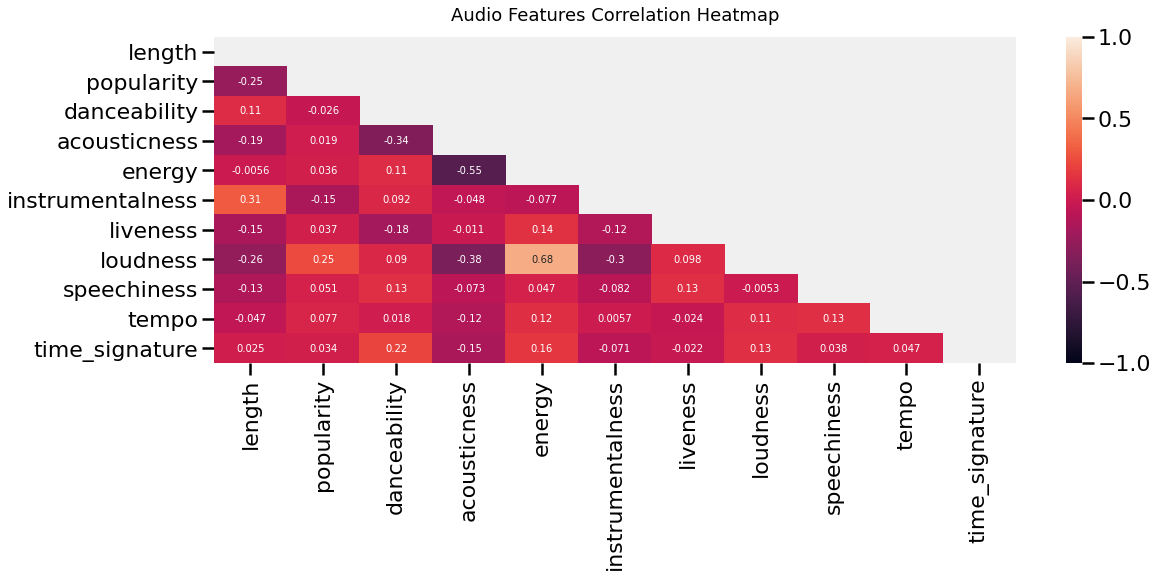

In [91]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(no_dupli.corr(), dtype=np.bool))
heatmap = sns.heatmap(no_dupli.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Audio Features Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [92]:
no_dupli.head()

,Artist,Track Name,album,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,21 Savage,Mr. Right Now (feat. Drake),SAVAGE MODE II,atl hip hop,02/10/2020,193838,87,0.647,0.23100,0.667,0.000000,0.133,-5.563,0.3040,172.080,4
1,21 Savage,Runnin,SAVAGE MODE II,atl hip hop,02/10/2020,195906,87,0.819,0.00748,0.626,0.101000,0.167,-4.574,0.2020,143.010,4
2,21 Savage,Glock In My Lap,SAVAGE MODE II,atl hip hop,02/10/2020,193591,83,0.847,0.00574,0.733,0.000010,0.151,-6.439,0.1600,130.029,4
3,21 Savage,Rich Nigga Shit (feat. Young Thug),SAVAGE MODE II,atl hip hop,02/10/2020,190331,81,0.825,0.34900,0.733,0.000000,0.112,-5.625,0.0969,97.974,4
4,21 Savage,Slidin,SAVAGE MODE II,atl hip hop,02/10/2020,185036,80,0.774,0.00163,0.706,0.000001,0.104,-6.494,0.3550,152.891,4


Text(0.5, 1.0, 'popularity')

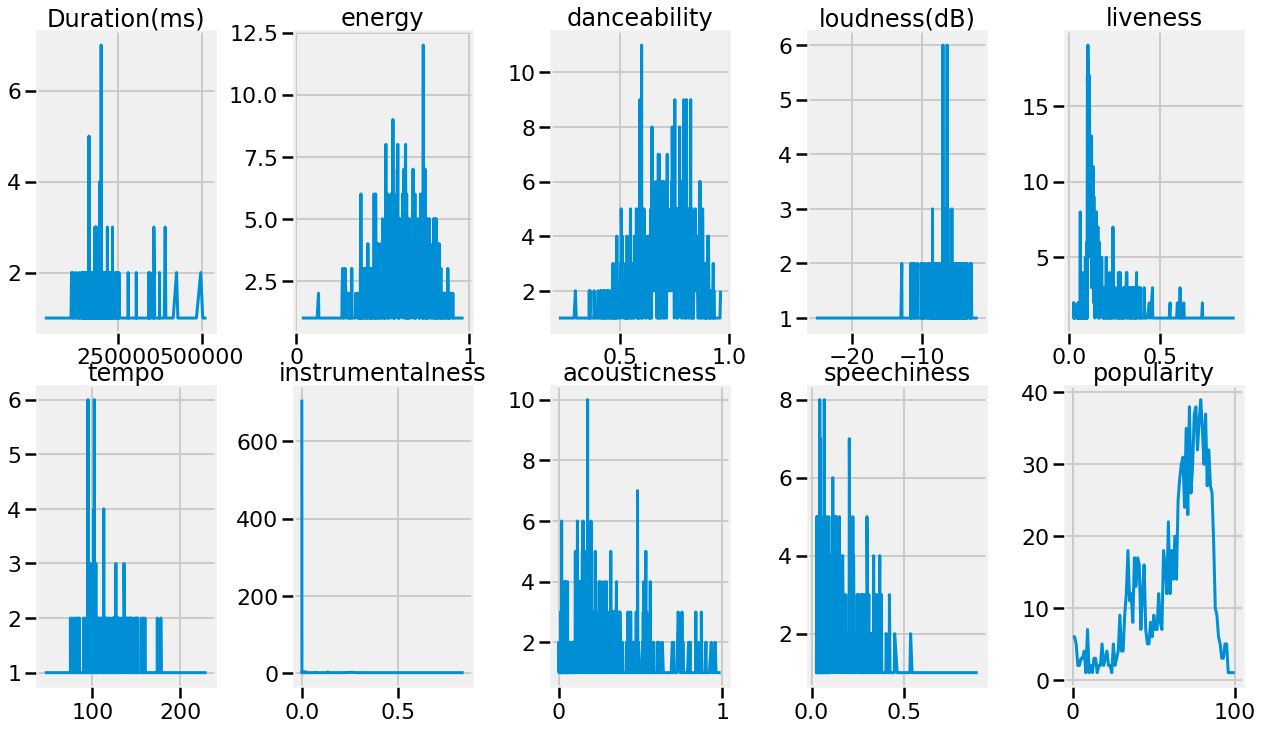

In [93]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18,10))
plt.tight_layout()
axes[0][0].plot(no_dupli['length'].value_counts().sort_index())
axes[0][0].set_title('Duration(ms)')
axes[0][1].plot(no_dupli['energy'].value_counts().sort_index())
axes[0][1].set_title('energy')
axes[0][2].plot(no_dupli['danceability'].value_counts().sort_index())
axes[0][2].set_title('danceability')
axes[0][3].plot(no_dupli['loudness'].value_counts().sort_index())
axes[0][3].set_title('loudness(dB)')
axes[0][4].plot(no_dupli['liveness'].value_counts().sort_index())
axes[0][4].set_title('liveness')
axes[1][0].plot(no_dupli['tempo'].value_counts().sort_index())
axes[1][0].set_title('tempo')
axes[1][1].plot(no_dupli['instrumentalness'].value_counts().sort_index())
axes[1][1].set_title('instrumentalness')
axes[1][2].plot(no_dupli['acousticness'].value_counts().sort_index())
axes[1][2].set_title('acousticness')
axes[1][3].plot(no_dupli['speechiness'].value_counts().sort_index())
axes[1][3].set_title('speechiness')
axes[1][4].plot(no_dupli['popularity'].value_counts().sort_index())
axes[1][4].set_title('popularity')



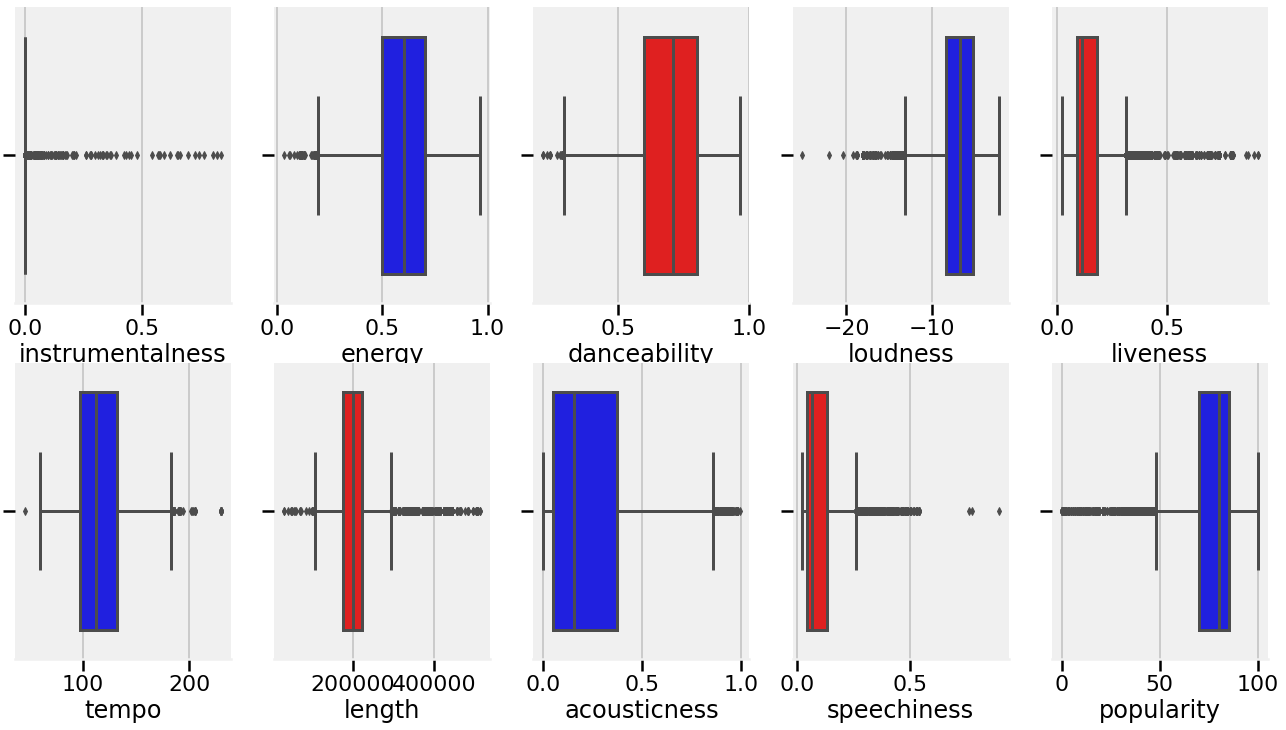

In [94]:
f, axes = plt.subplots(2, 5, figsize=(20, 12))
sns.despine(left=True)
sns.boxplot(x=no_dupli.instrumentalness, color="r", ax=axes[0, 0])
sns.boxplot(x=df.energy,color="b", ax=axes[0, 1])
sns.boxplot(x=df.danceability, color="r", ax=axes[0, 2])
sns.boxplot(x=df.loudness, color="b", ax=axes[0, 3])
sns.boxplot(x=df.liveness, color="r", ax=axes[0, 4])
sns.boxplot(x=df.tempo, color="b", ax=axes[1, 0])
sns.boxplot(x=df.length, color="r", ax=axes[1, 1])
sns.boxplot(x=df.acousticness, color="b", ax=axes[1, 2])
sns.boxplot(x=df.speechiness, color="r", ax=axes[1, 3])
sns.boxplot(x=df.popularity, color="b", ax=axes[1, 4])

In [95]:
fig = px.scatter(df, x="danceability", y="energy", color='energy', hover_name='Track Name', hover_data=['Artist','artist_top_genre'])
fig.show()

In [96]:
px.box(df_genre1, x='artist_top_genre', color='artist_top_genre',y="speechiness", points='all', hover_name='Track Name', hover_data=['Artist'])

In [97]:
px.box(df_genre1, x='artist_top_genre', color='artist_top_genre',y="tempo", points='all', hover_name='Track Name', hover_data=['Artist'])

In [98]:
#calculate the average of the popularity and the size of each genre 
genre_popularity = df.groupby(["artist_top_genre"], as_index=False)
genre_popularity = genre_popularity.agg({'popularity':[np.mean, np.size]})
genre_popularity.columns = list(map(''.join, genre_popularity.columns.values))
#sort
genre_popularity = genre_popularity.sort_values(by=["popularitymean"], ascending = False)

genre_popularity.head(30)

,artist_top_genre,popularitymean,popularitysize
94,sad rap,90.810811,37
86,nz pop,89.022727,44
80,modern indie pop,89.000000,7
103,tropical house,89.000000,28
75,latin,88.833333,6
90,pop r&b,86.000000,6
21,bedroom soul,86.000000,40
46,contemporary country,85.031250,64
57,emo rap,84.615942,138
34,cali rap,84.375000,88


In [99]:
fig = px.scatter(genre_popularity, y="popularitymean", x="popularitysize", hover_name='artist_top_genre', hover_data=['artist_top_genre'])
fig.show()

### Clustering

Check this [github](https://github.com/MattFinney/practical_data_science_in_python) for step by step

In [100]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
rs = 123
np.random.seed(rs)

def pca_plot(df, classes=None):

    # Scale data for PCA
    scaled_df = StandardScaler().fit_transform(df)
    
    # Fit the PCA and extract the first two components
    pca_results = PCA().fit_transform(scaled_df)
    pca1_scores = pca_results[:,0]
    pca2_scores = pca_results[:,1]
    
    # Sort the legend labels
    if classes is None:
      hue_order = None
      n_classes = 0
    elif str(classes[0]).isnumeric():
      classes = ['Cluster {}'.format(x) for x in classes]
      hue_order = sorted(np.unique(classes))
      n_classes = np.max(np.unique(classes).shape)
    else:
      hue_order = sorted(np.unique(classes))
      n_classes = np.max(np.unique(classes).shape)

    # Plot the first two principal components
    plt.figure(figsize=(8.5,8.5))
    plt.grid()
    sns.scatterplot(pca1_scores, pca2_scores, s=50, hue=classes,
                    hue_order=hue_order, palette='Set1')
    plt.xlabel("Principal Component {}".format(1))
    plt.ylabel("Principal Component {}".format(2))
    plt.title('Principal Component Plot')
    plt.show()

In [101]:
no_dupli.head()

,Artist,Track Name,album,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,21 Savage,Mr. Right Now (feat. Drake),SAVAGE MODE II,atl hip hop,02/10/2020,193838,87,0.647,0.23100,0.667,0.000000,0.133,-5.563,0.3040,172.080,4
1,21 Savage,Runnin,SAVAGE MODE II,atl hip hop,02/10/2020,195906,87,0.819,0.00748,0.626,0.101000,0.167,-4.574,0.2020,143.010,4
2,21 Savage,Glock In My Lap,SAVAGE MODE II,atl hip hop,02/10/2020,193591,83,0.847,0.00574,0.733,0.000010,0.151,-6.439,0.1600,130.029,4
3,21 Savage,Rich Nigga Shit (feat. Young Thug),SAVAGE MODE II,atl hip hop,02/10/2020,190331,81,0.825,0.34900,0.733,0.000000,0.112,-5.625,0.0969,97.974,4
4,21 Savage,Slidin,SAVAGE MODE II,atl hip hop,02/10/2020,185036,80,0.774,0.00163,0.706,0.000001,0.104,-6.494,0.3550,152.891,4


In [102]:
audio_feature_cols = ['danceability', 'energy', 'loudness', 
                      'speechiness', 'acousticness', 'instrumentalness',
                      'liveness', 'tempo', 'length',
                      'time_signature']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



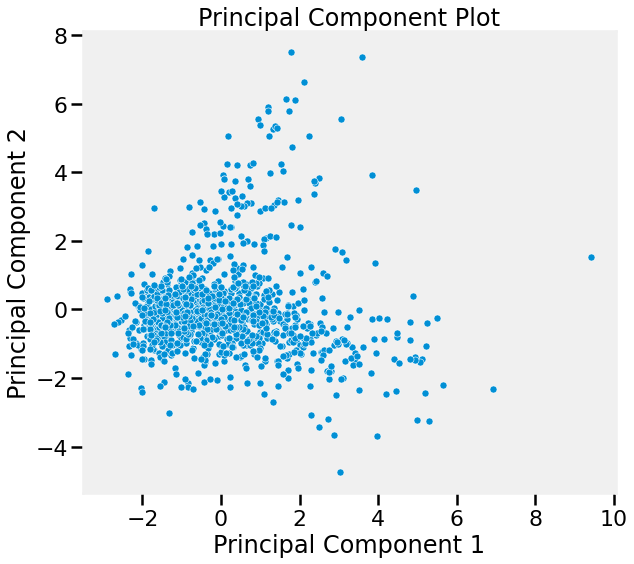

In [103]:
# Plot the principal component analysis results
pca_plot(no_dupli[audio_feature_cols])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



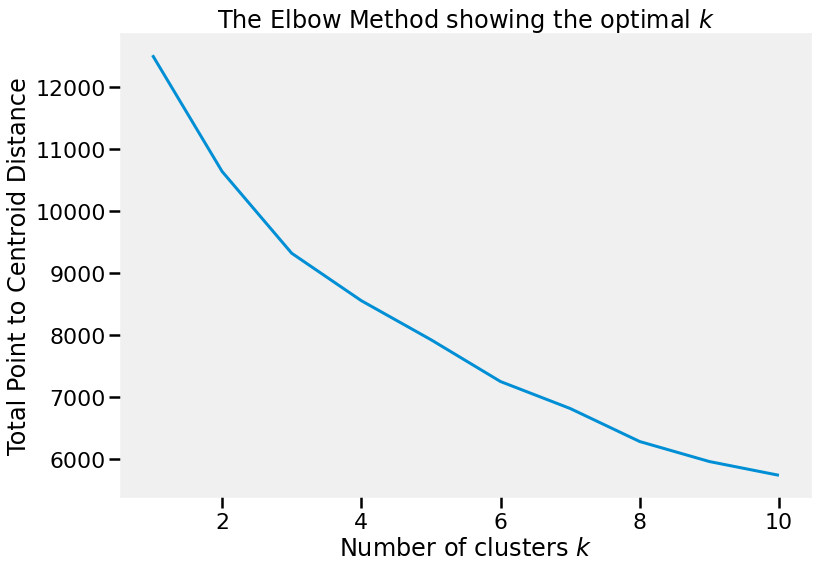

In [104]:
scaled_df = StandardScaler().fit_transform(no_dupli[audio_feature_cols])
# Calculate the Total Distance for each value of k between 1 and 10
scores = []
for i in range(1,11):
    fit_k = KMeans(n_clusters=i, n_init=5, random_state=rs).fit(scaled_df)
    scores.append(fit_k.inertia_)

# Plot this in an elbow plot
plt.figure(figsize=(11,8.5))
sns.lineplot(range(1,11), scores, palette=sns.color_palette('Set1'))
plt.xlabel('Number of clusters $k$')
plt.ylabel('Total Point to Centroid Distance')
plt.grid()
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



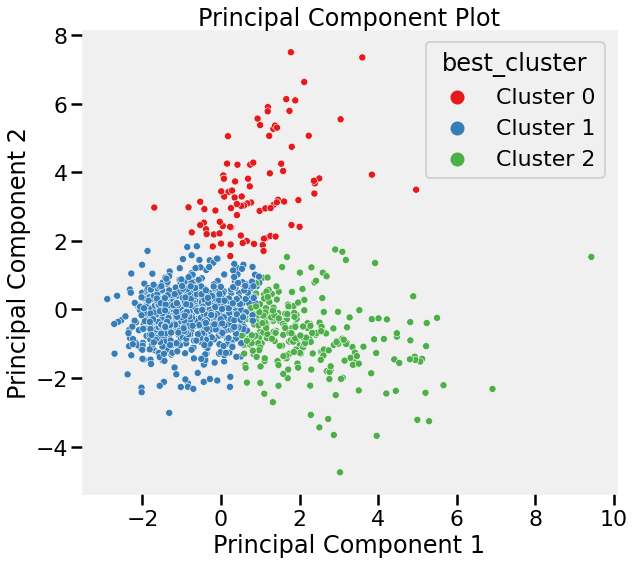

In [105]:
best_k = 3
best_cluster_results = KMeans(n_clusters=best_k, n_init=25, random_state=rs).fit(scaled_df)

# Save the cluster labels in our dataframe
no_dupli['best_cluster'] = ['Cluster ' + str(i) for i in best_cluster_results.labels_]

# Show a PCA plot of the clusters
pca_plot(no_dupli[audio_feature_cols], classes=no_dupli['best_cluster'])

In [106]:
no_dupli.head()

,Artist,Track Name,album,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,best_cluster
0,21 Savage,Mr. Right Now (feat. Drake),SAVAGE MODE II,atl hip hop,02/10/2020,193838,87,0.647,0.23100,0.667,0.000000,0.133,-5.563,0.3040,172.080,4,Cluster 1
1,21 Savage,Runnin,SAVAGE MODE II,atl hip hop,02/10/2020,195906,87,0.819,0.00748,0.626,0.101000,0.167,-4.574,0.2020,143.010,4,Cluster 1
2,21 Savage,Glock In My Lap,SAVAGE MODE II,atl hip hop,02/10/2020,193591,83,0.847,0.00574,0.733,0.000010,0.151,-6.439,0.1600,130.029,4,Cluster 1
3,21 Savage,Rich Nigga Shit (feat. Young Thug),SAVAGE MODE II,atl hip hop,02/10/2020,190331,81,0.825,0.34900,0.733,0.000000,0.112,-5.625,0.0969,97.974,4,Cluster 1
4,21 Savage,Slidin,SAVAGE MODE II,atl hip hop,02/10/2020,185036,80,0.774,0.00163,0.706,0.000001,0.104,-6.494,0.3550,152.891,4,Cluster 1


In [107]:
no_dupli.groupby(['best_cluster'],as_index=False).size()

,best_cluster,size
0,Cluster 0,94
1,Cluster 1,885
2,Cluster 2,272


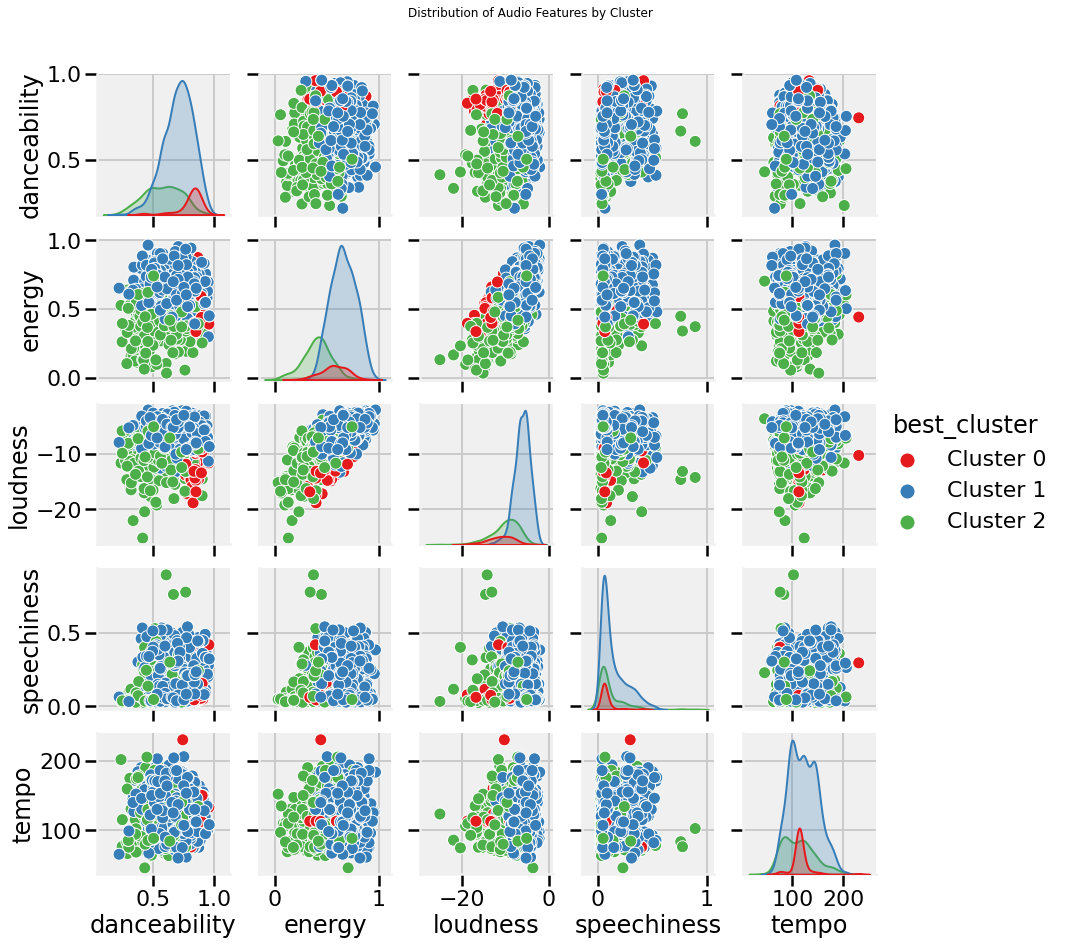

In [108]:
# Plot the distribution of audio features by cluster
g = sns.pairplot(no_dupli, hue="best_cluster",
                 vars=['danceability', 'energy', 'loudness', 'speechiness', 'tempo'],
                 hue_order=sorted(no_dupli.best_cluster.unique()), palette='Set1')
g.fig.suptitle('Distribution of Audio Features by Cluster', y=1.05)
plt.show()

In [109]:
c = no_dupli.groupby(['artist_top_genre','Artist','Track Name'], as_index=False)['popularity'].mean().sort_values(by='popularity').head(20)

In [110]:
px.sunburst(c, path=['artist_top_genre', 'Artist', 'Track Name'], values='popularity', title= 'Sunburst chart for top songs',
           color_discrete_sequence=px.colors.qualitative.Set2)